<h3> Wine Quality EDA</h3>


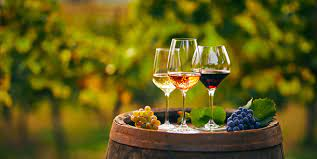 
 

<h3> Description of the Variables</h3>

- `fixed acidity`: most acids involved with wine or fixed or nonvolatile(do not evaporate readily)

- `volatile acidity`: the amount of acetic acid in wine, which at too high levels can lead to an unpleasant, vinegar taste

- `citric acid`: found in small quantities, citric acid can add freshness and flavor to wines

- `residual sugar`: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

-`chlorides`: the amount of salt in the wine
 
-`free sulphur dioxide`: the free form of SO2 exists in equilibruim between molecular (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

-`total sulphur dioxide`: the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugar.

-`density`: density is the mass per unit volume of wine or must at 20 degrees celsius. which is expressed in grams per milliliter, and denoted by the symbol p 20 degrees celsius.

-`pH`: is the measure of the degree of relative acidity versus the relative alkalinity of any liquid, on a scale of 0 to 14, with 7 being neutral. it is also used as a way to measure ripeness in relation to acidity during wine production. low pH wine will taste tart(sour) and crisp, while higher pH wines are more susceptible to bacterial growth.

- `sulphates`: sulfites are a food preservative widely used in winemaking, it has the ability to maintain the flavor and freshness of wine.


- `alcohol`: the percent alcohol content of the wine.


- `quality`: wine quality refers to the factors that go into producing a wine, as well as the indicators or characteristics that tell you if the wine is of high quality,(score between 0 and 10)


<h3>summary</h3>

The main aim for this project is to analysis how different variables which is the fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates, alcohol, affect the quality of wine during wine production.

Each of these columns will be picked and analysed to show their impact on the quality

we will also use plots and graphs for better visualization and understanding.


<h3> Objectives</h3>

- To experiment with two different classification methods, so we can see which yields the highest accuracy.

- To also determine which features are the most indicative of a good quality wine.

In [1]:
#hiding unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [3]:
#importing dataset, and displaying the first ten column
wine_df = pd.read_csv('WineQT.csv')
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [4]:
#getting the shape of our dataframe.
wine_df.shape

(1143, 13)

There is 1143 entries and 13 columns

In [5]:
#getting the info of our dataset
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#getting the statiscal summary of our dataset
wine_df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000
mean,8.311,0.531,0.268,2.532,0.087,15.615,45.915,0.997,3.311,0.658,10.442,5.657,804.969
std,1.748,0.180,0.197,1.356,0.047,10.250,32.782,0.002,0.157,0.170,1.082,0.806,463.997
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
25%,7.100,0.392,0.090,1.900,0.070,7.000,21.000,0.996,3.205,0.550,9.500,5.000,411.000
50%,7.900,0.520,0.250,2.200,0.079,13.000,37.000,0.997,3.310,0.620,10.200,6.000,794.000
75%,9.100,0.640,0.420,2.600,0.090,21.000,61.000,0.998,3.400,0.730,11.100,6.000,1209.500
max,15.900,1.580,1.000,15.500,0.611,68.000,289.000,1.004,4.010,2.000,14.900,8.000,1597.000


In [7]:
#checking for missing values in the dataset
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

There isn't any missing value in our dataset

<h3> Analysis of wine quality</h3>

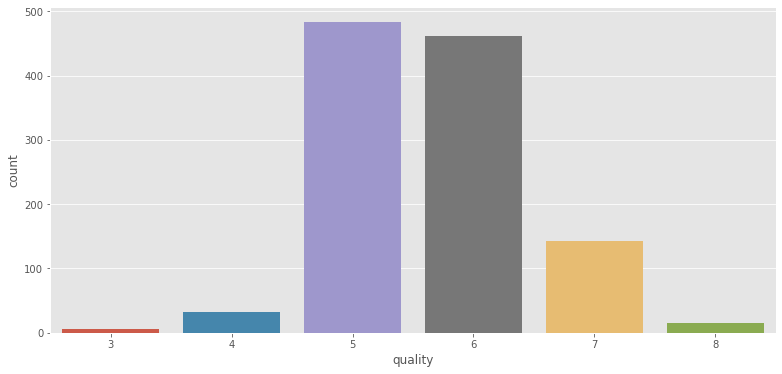

In [8]:
#analysis of quality of wine using countplot
plt.figure(figsize=(13,6))
sns.countplot(wine_df['quality'])
plt.show()

In [9]:
#getting the different counts in the wine quality
wine_df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

- The max count of wine's quality is 5 and it's count is 483
- The quality of wine most prefered has the quality of "5"

<h3> Comparison of quality vs the alcohol content</h3>

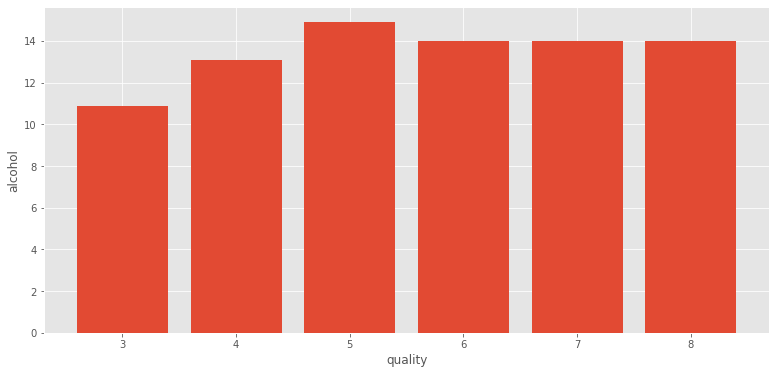

In [10]:
#using a barplot to visualize the quality and alcohol 
plt.figure(figsize=(13,6))
plt.bar(wine_df['quality'],wine_df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

- The quality of wine increases with an increase in alcohol, the wine with the highest number of alcohol in it turns out to be our best quality wine which is "5".so the alcohol content affects both flavor and texture of the wine.

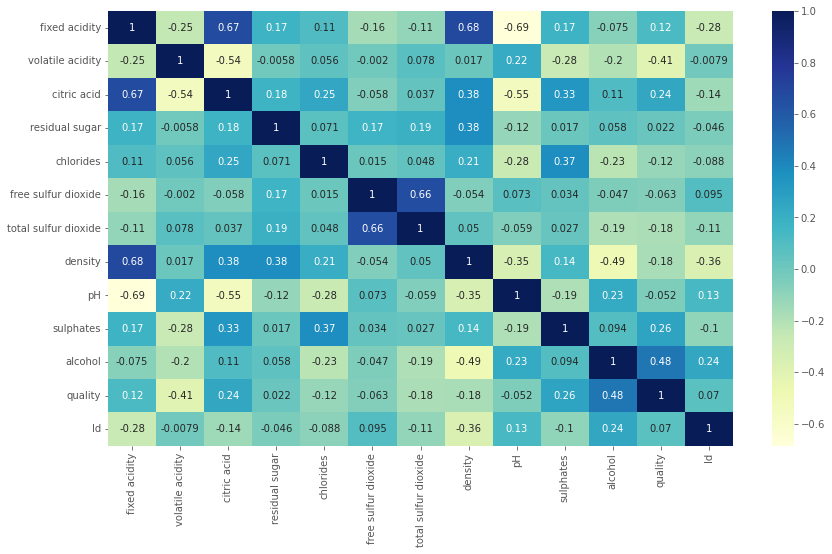

In [11]:
#displaying the correlations in our dataset
plt.figure(figsize=(14,8))
cor = wine_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

In [12]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [13]:
#identifying positive correlations with target variable
target_corr = abs(cor["quality"]) #quality is target variable
positive_corr_target = target_corr[target_corr > (0.1)]
positive_corr_target

fixed acidity           0.121970
volatile acidity        0.407394
citric acid             0.240821
chlorides               0.124085
total sulfur dioxide    0.183339
density                 0.175208
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

- Fixed acidity, volatile acidity, citric acid, chlorides, total sulfur dioxide, density, sulphates, alcohol.....all have a positive correlation with quality.

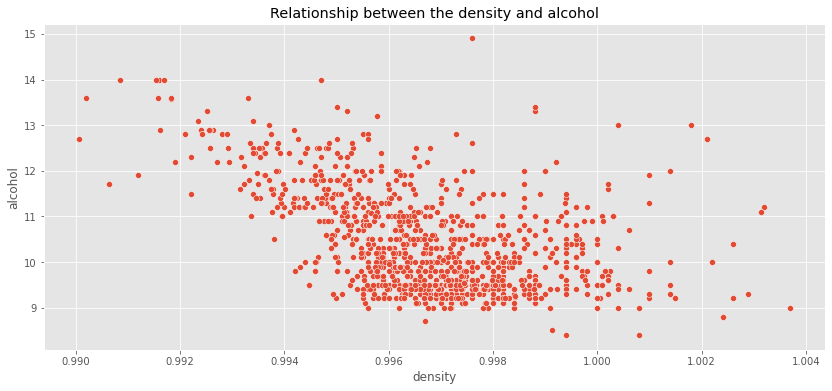

In [14]:
#visualising the relationship between the alcohol and density.
plt.figure(figsize=(14,6))
plt.title('Relationship between the density and alcohol')
sns.scatterplot(x='density', y='alcohol',data=wine_df);

There is an inverse relationship between the alcohol and density. Alcohol has less density compared to other consumable liquids, so as the alcohol content increases the density drops.The more alcohol a wine contains it should decrease the overall density of the wine.

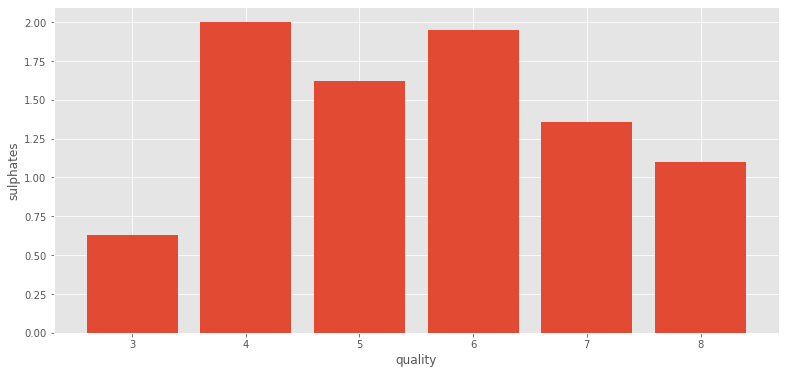

In [15]:
#effects of sulphates to the wines quality
plt.figure(figsize=(13,6))
plt.bar(wine_df['quality'],wine_df['sulphates'])
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

- As sulphate increases, so does quality. our best wine quality which is "5", contains just the right amount of sulphates which is between 1.50-1.62 SO2. sulphates are used as antimicrobial(that kills micro-organisms and stops their growth), so it would make sense to say that the more clean a wine is, the better it tastes, that's why there is an increase in quality.

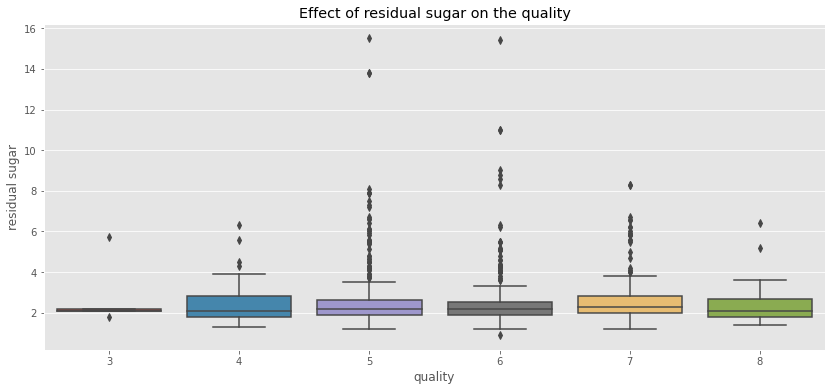

In [16]:
#showing the effect residual sugar has on the quality using a boxplot
plt.figure(figsize=(14, 6))
plt.title('Effect of residual sugar on the quality')
sns.boxplot(x='quality', y='residual sugar', data=wine_df);

- from the above plot it is observed that, good wines have less residual sugar in them, our best quality wine which is "5" has a small amount of residual sugar between 2-3 in it.

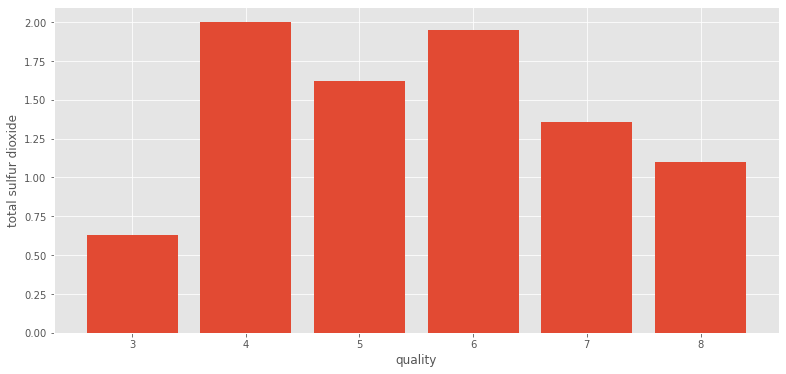

In [142]:
#
plt.figure(figsize=(13,6))
plt.bar(wine_df['quality'],wine_df['sulphates'])
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.show()

- The TSO4 has an effect on the wine's quality, from the graph we observe that our best quality wine which is 5 contains 1.50 - 1.52 ppm of TSO4 in it.

<h3>Training the model</h3>

In [47]:
# importing the required machine learning libraries for building model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [30]:
#make a copy of dataset and viewing the first five column
df = wine_df.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [31]:
#drop the Id column and get the first five columns
df_new = df.drop(['Id'],axis=1)
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
#define the feature and target column
X= df_new.drop(['quality'], axis=1)
y= df_new['quality']

In [33]:
X = df_new.drop(['quality'],axis=1)
y = df_new['quality']

<h3>Splitting our dataset</h3>

In [112]:
# spliting the test and train data into a 80% train size and 20% test size
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=35)

In [113]:
#getting the X_train
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
843,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5
101,6.9,0.490,0.10,2.3,0.074,12.0,30.0,0.99590,3.42,0.58,10.2
576,8.6,0.550,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
128,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
689,9.5,0.860,0.26,1.9,0.079,13.0,28.0,0.99712,3.25,0.62,10.0
...,...,...,...,...,...,...,...,...,...,...,...
744,9.9,0.530,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6
959,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5
1004,8.2,0.240,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.9
1057,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1


In [114]:
#getting the shape of the X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((914, 11), (914,), (229, 11), (229,))

In [115]:
y_train

843     6
101     6
576     5
128     5
689     5
       ..
744     7
959     5
1004    6
1057    4
951     5
Name: quality, Length: 914, dtype: int64

<h3> RandomForest Classifier</h3>

In [116]:
model = RandomForestClassifier()

In [117]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [118]:
y_pred = log_model.predict(X_test)

In [119]:
test_rmse = mean_squared_error(y_test,y_pred, squared=False)
print('The RMSE loss for the testing set is {}.'.format(test_rmse))

The RMSE loss for the testing set is 0.6541770389223969.


In [120]:
accuracy_score(y_test, y_pred)

0.611353711790393

<h3>LogisticRegression</h3>

In [121]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [122]:
#making predictions using the model
y_pred = log_model.predict(X_test)

In [123]:
# Calculation of Mean Squared Error (MSE)
test_rmse = mean_squared_error(y_test,y_pred, squared=False)
print('The RMSE loss for the testing set is {}.'.format(test_rmse))


The RMSE loss for the testing set is 0.6541770389223969.


In [124]:
accuracy_score(y_test, y_pred)

0.611353711790393

<h3> Feature Importance </h3>

In [132]:
weights = model.feature_importances_
weights[0:10]

array([0.07436447, 0.10421564, 0.07613554, 0.06387554, 0.07891645,
       0.06572509, 0.1039057 , 0.08922891, 0.07833636, 0.11923976])

In [137]:
#creating a dataframe to view the weight assigned to each column.
weights_df = pd.DataFrame({
    'columns': X_train.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [138]:
weights_df.head(11)

,columns,weight
10,alcohol,0.146057
9,sulphates,0.119240
1,volatile acidity,0.104216
6,total sulfur dioxide,0.103906
7,density,0.089229
4,chlorides,0.078916
8,pH,0.078336
2,citric acid,0.076136
0,fixed acidity,0.074364
5,free sulfur dioxide,0.065725


The values towards the top are the most important features, and those towards the bottom matter least. the most important features are alcohol, sulphates, volatile acidity,total sulfur dioxide.

<h3> Comparing the Top 4 Features......(alcohol,sulphates,volatile acidity, total sulfur dioxide) to see how it affects the wine's quality</h3>

In [139]:
#creating a classification version of our target variable
df_new['goodquality']= [1 if x ==5 else 0 for x in 
                        df_new['quality']]

In [140]:
#let's see the proportion of good wine vs the bad wines
df_new['goodquality'].value_counts()

0    660
1    483
Name: goodquality, dtype: int64

we have a fair number of quality wines(483) in our dataset

In [141]:
#filtering df for only good quality
good_df = df_new[df_new['goodquality']==1]
good_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.0,483.0
mean,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,5.0,1.0
std,1.557746,0.168226,0.179700,1.436499,0.052325,10.960945,36.548411,0.001637,0.149590,0.160980,0.752592,0.0,0.0
min,5.000000,0.180000,0.000000,1.200000,0.039000,3.000000,8.000000,0.992560,2.880000,0.390000,8.500000,5.0,1.0
25%,7.100000,0.460000,0.090000,1.900000,0.074000,8.000000,23.500000,0.996100,3.200000,0.520000,9.400000,5.0,1.0
50%,7.800000,0.590000,0.230000,2.200000,0.081000,14.000000,46.000000,0.996920,3.300000,0.580000,9.700000,5.0,1.0
75%,8.900000,0.680000,0.350000,2.600000,0.094000,23.000000,80.500000,0.997950,3.390000,0.640000,10.200000,5.0,1.0
max,15.900000,1.330000,0.790000,15.500000,0.611000,68.000000,152.000000,1.003150,3.740000,1.620000,14.900000,5.0,1.0


<h3> Summary</h3>

- By looking into the above details, we can see that good quality wines have higher levels of alcohol (14.9),higher levels of sulphates on average(1.62), low in volatile acidity(0.1), but has a high level of total sulfur dioxide on average (152 ppm) (mg/l).

- we can say that all these are essential in other to make a good quality wine.

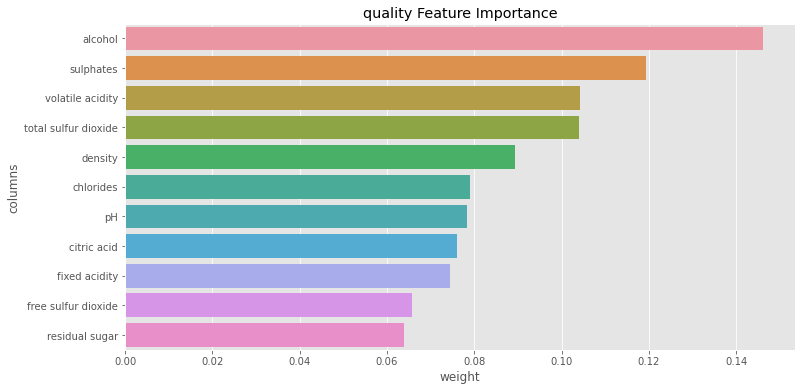

In [144]:
#visualization of the quality feature importance using a barplot
plt.figure(figsize=(12, 6))
plt.title('quality Feature Importance')
sns.barplot(y=weights_df.head(20)['columns'], x=weights_df.head(20)['weight']);